<h2 style='text-align: center;'> <font color='Green'><u>Case study on unsupervised learning</u></font> </h2>



### Try out different clustering models in the given dataset. Find the optimum number of clusters in each model and create the model with optimum number of clusters. Also learn about dB scan clustering and implement it

<h3 style='text-align: right;'> Submitted By:<font color='BLUE'>ATHIRA PRAKASH </font></h3>

import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn import metrics
py.offline.init_notebook_mode(connected=True)
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

Load Dataset

In [2]:
df = pd.read_csv(r"D:\DSA\data\Wine_clust .csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


EDA

In [3]:
df.shape

(178, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.shape

(178, 13)

In [7]:
# unique value counts

df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

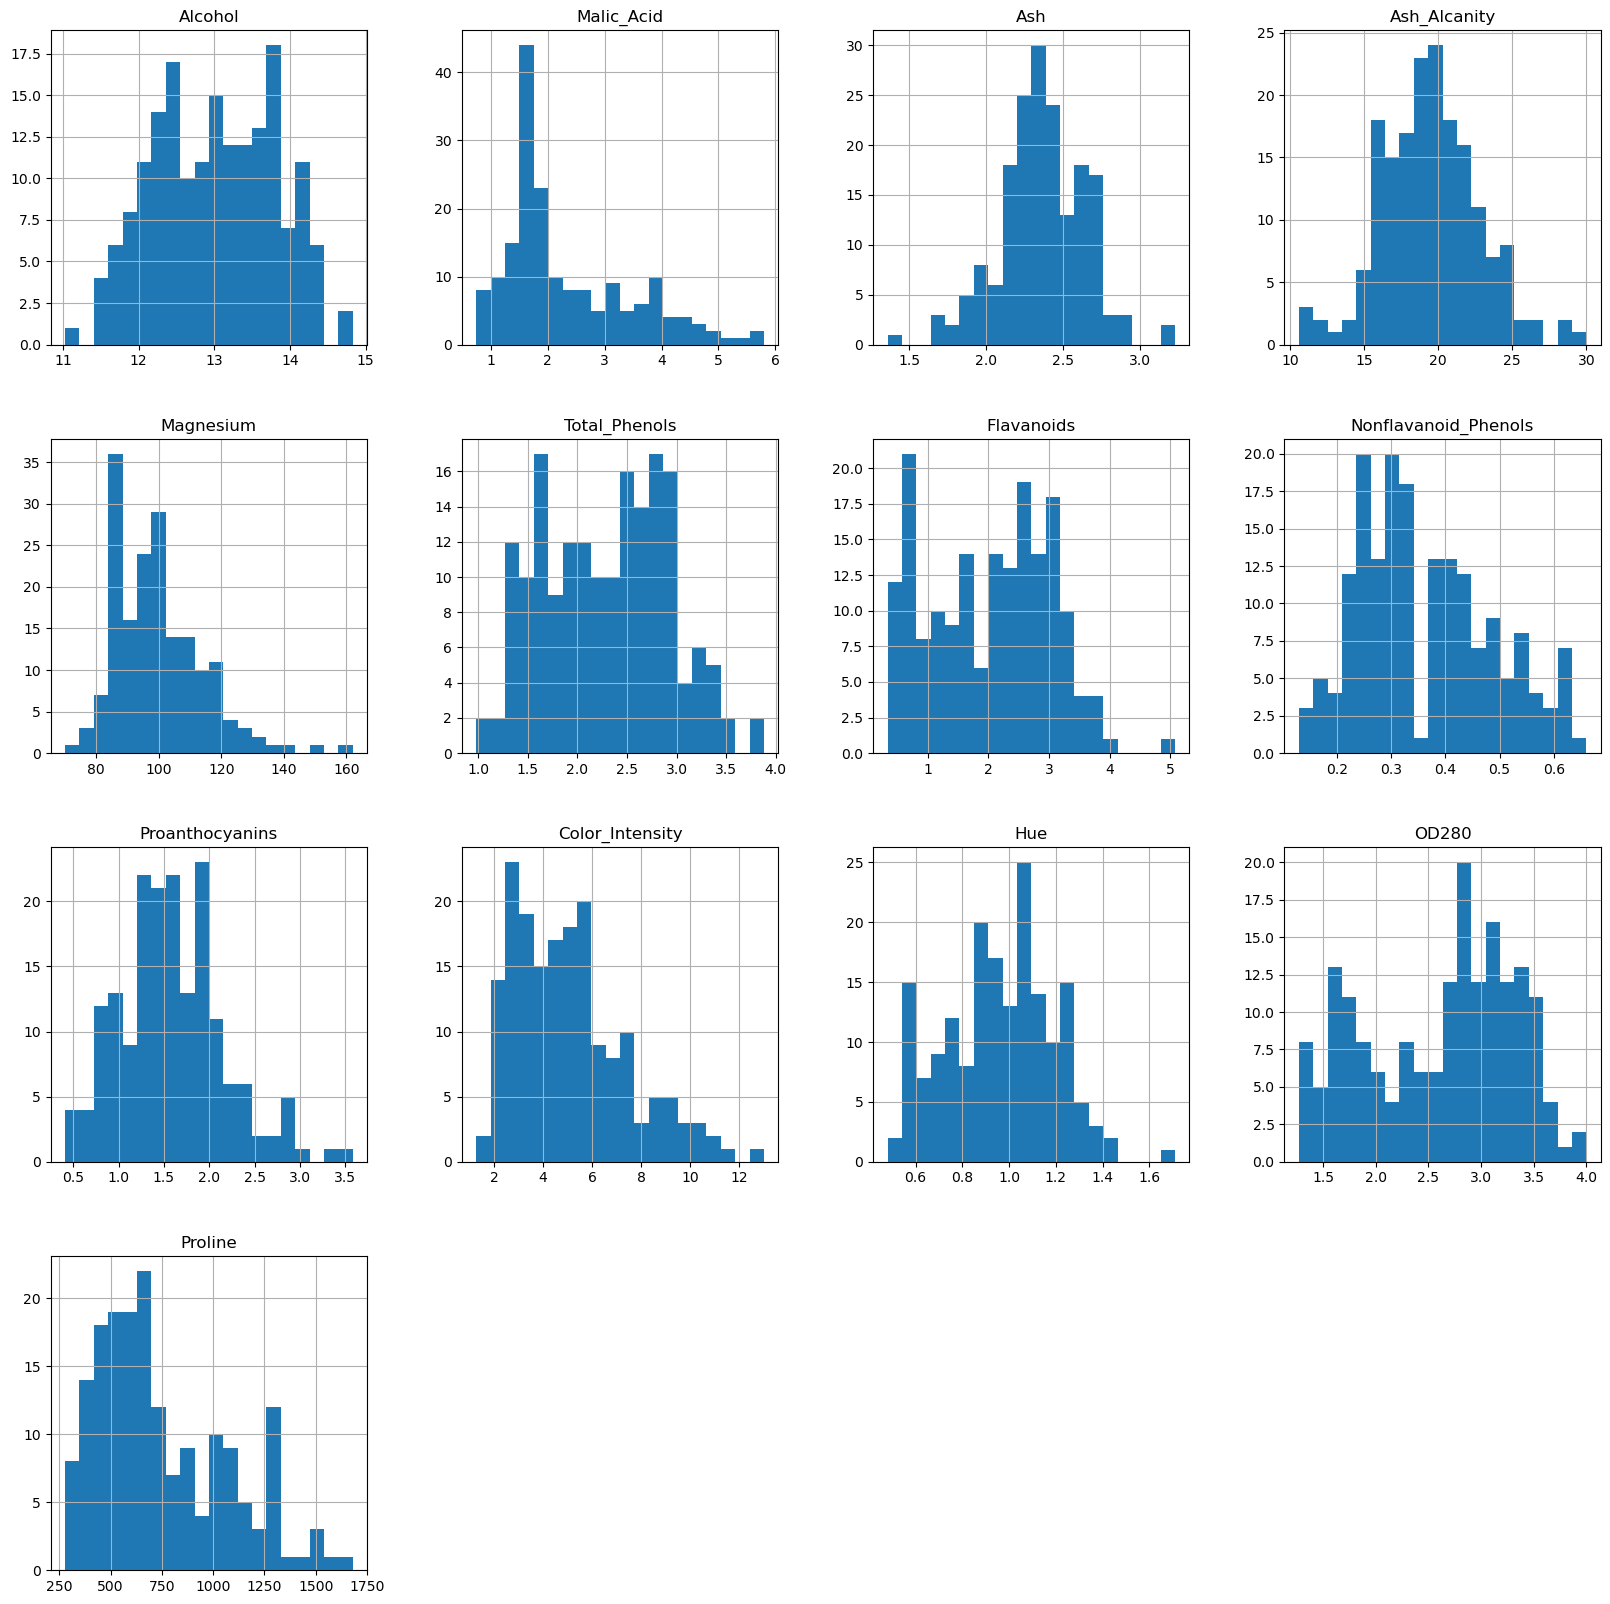

In [8]:
plt.rcParams["figure.figsize"] = (20, 20)
df.hist(bins=20)
plt.show()

<Figure size 2500x2500 with 0 Axes>

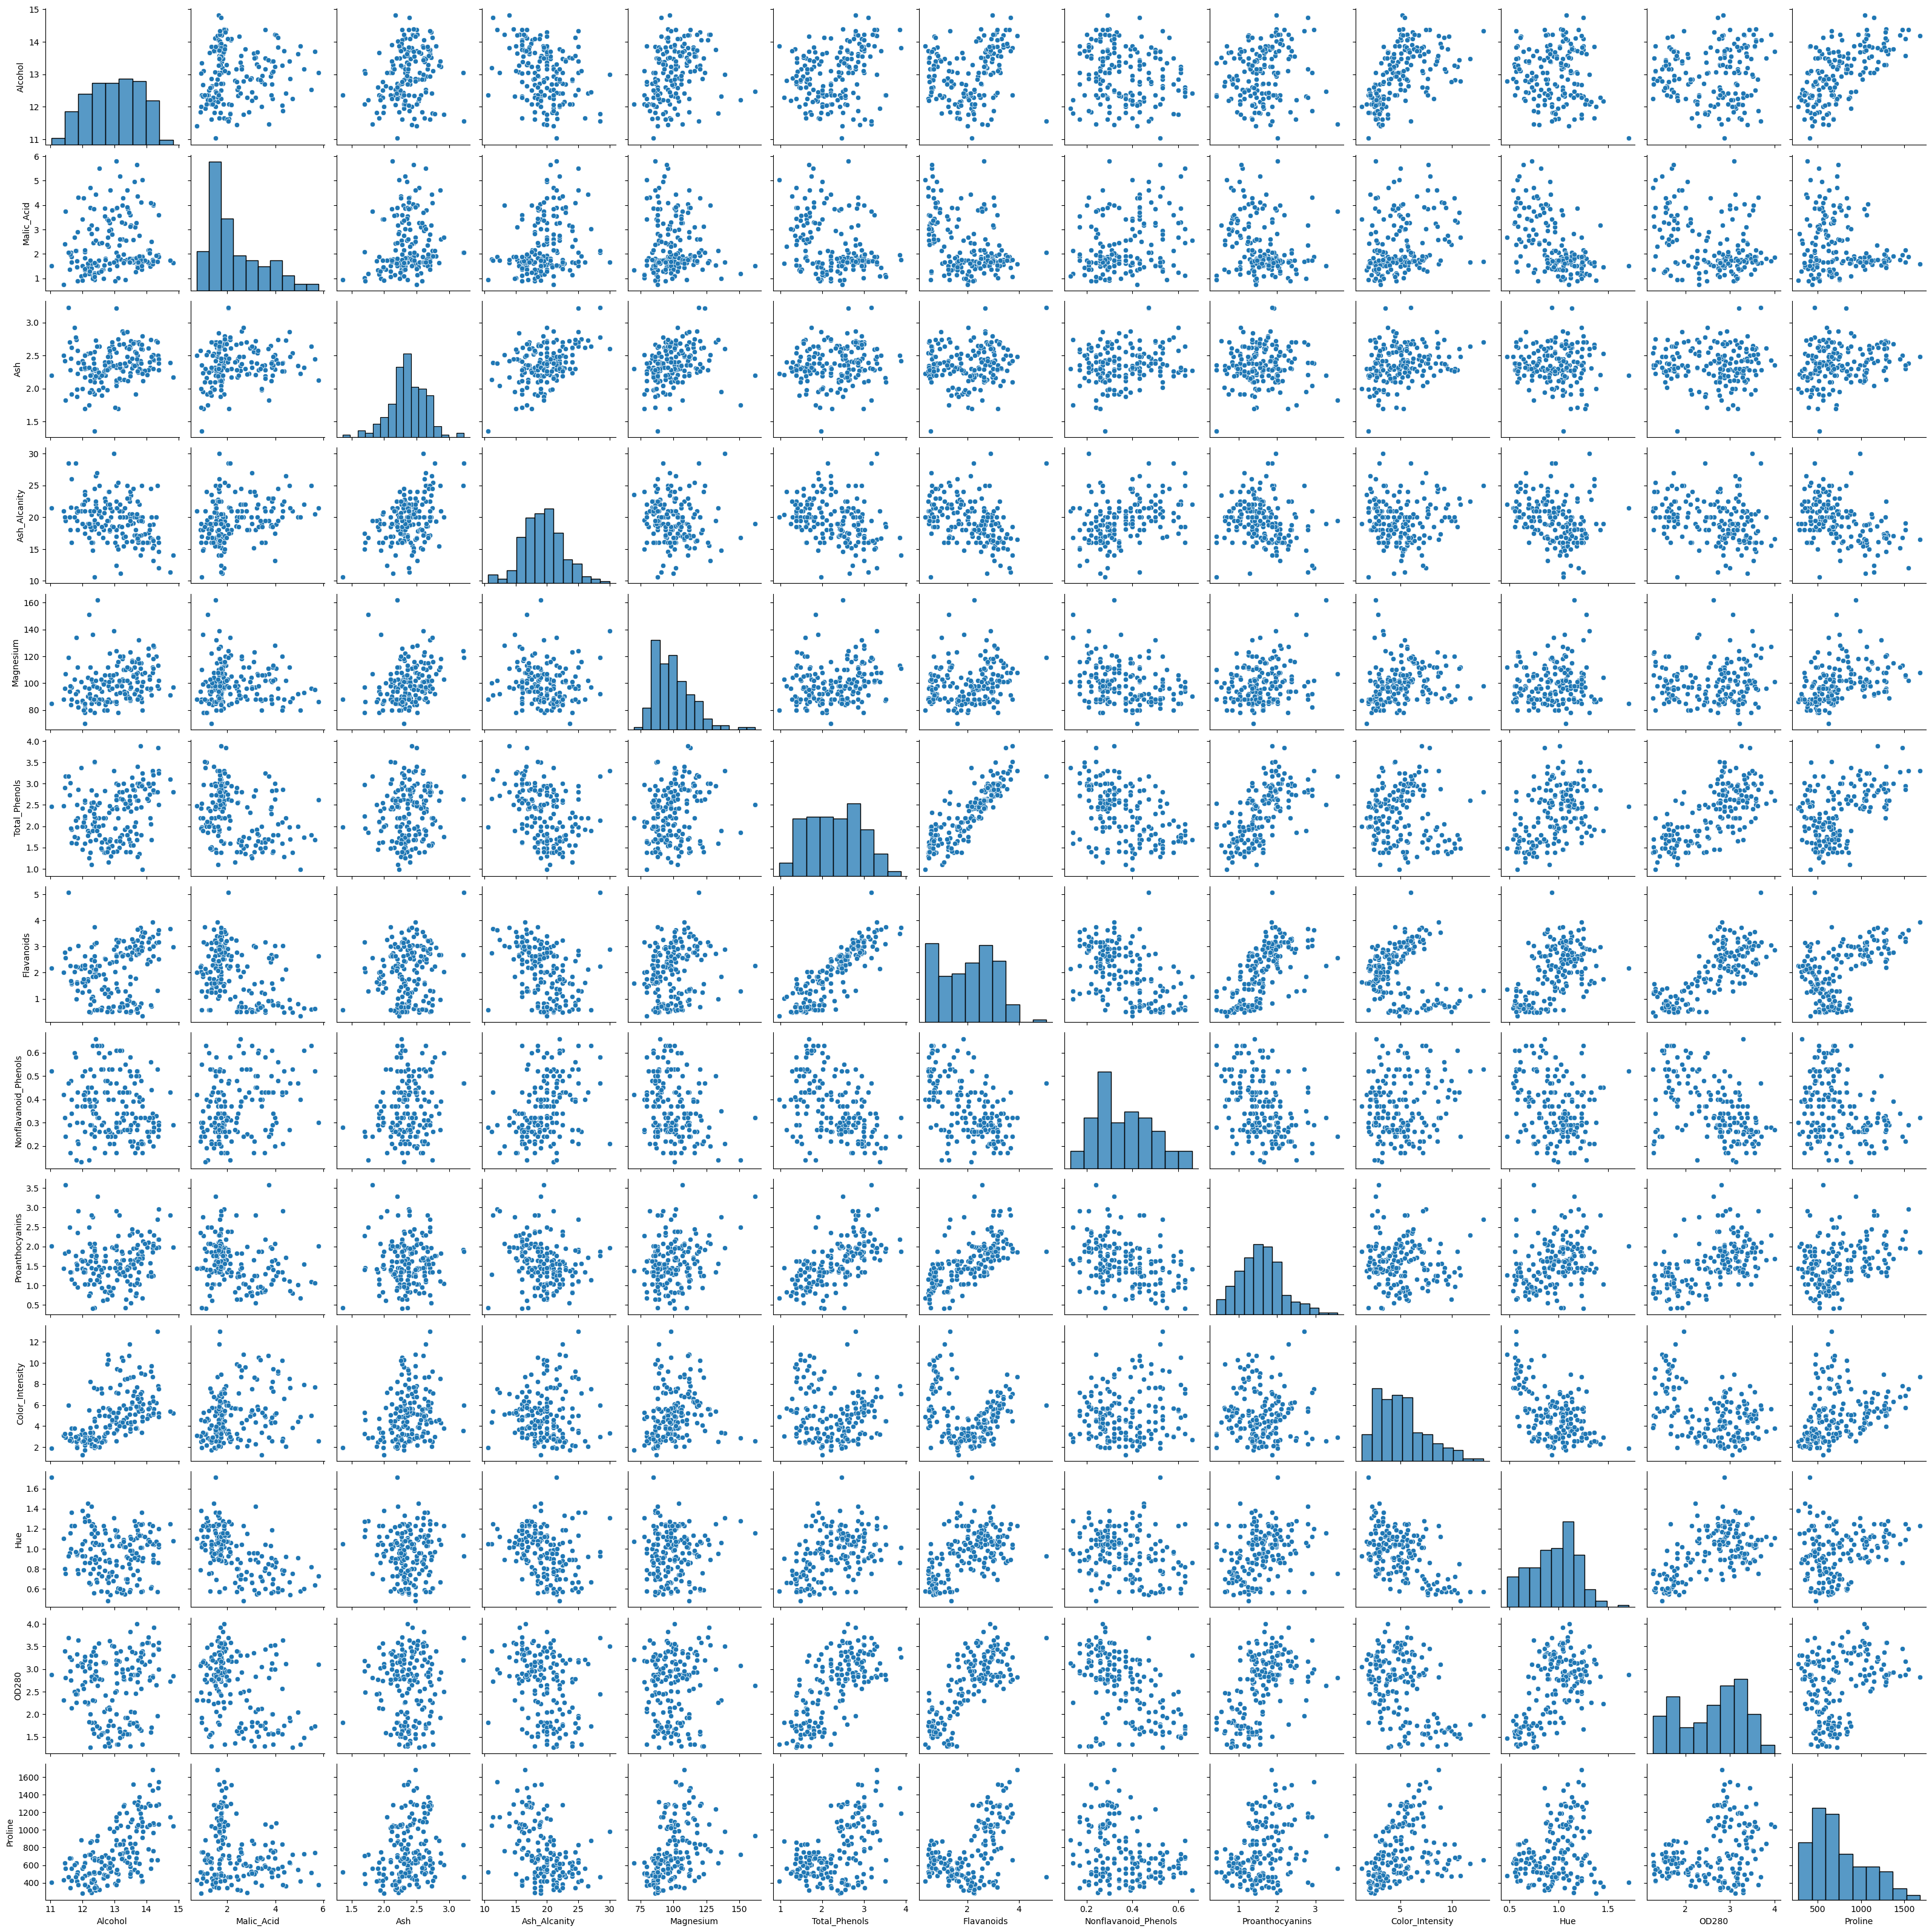

In [9]:
plt.figure(figsize=(25,25))
sns.pairplot(df)
plt.show()

### Correlation Check

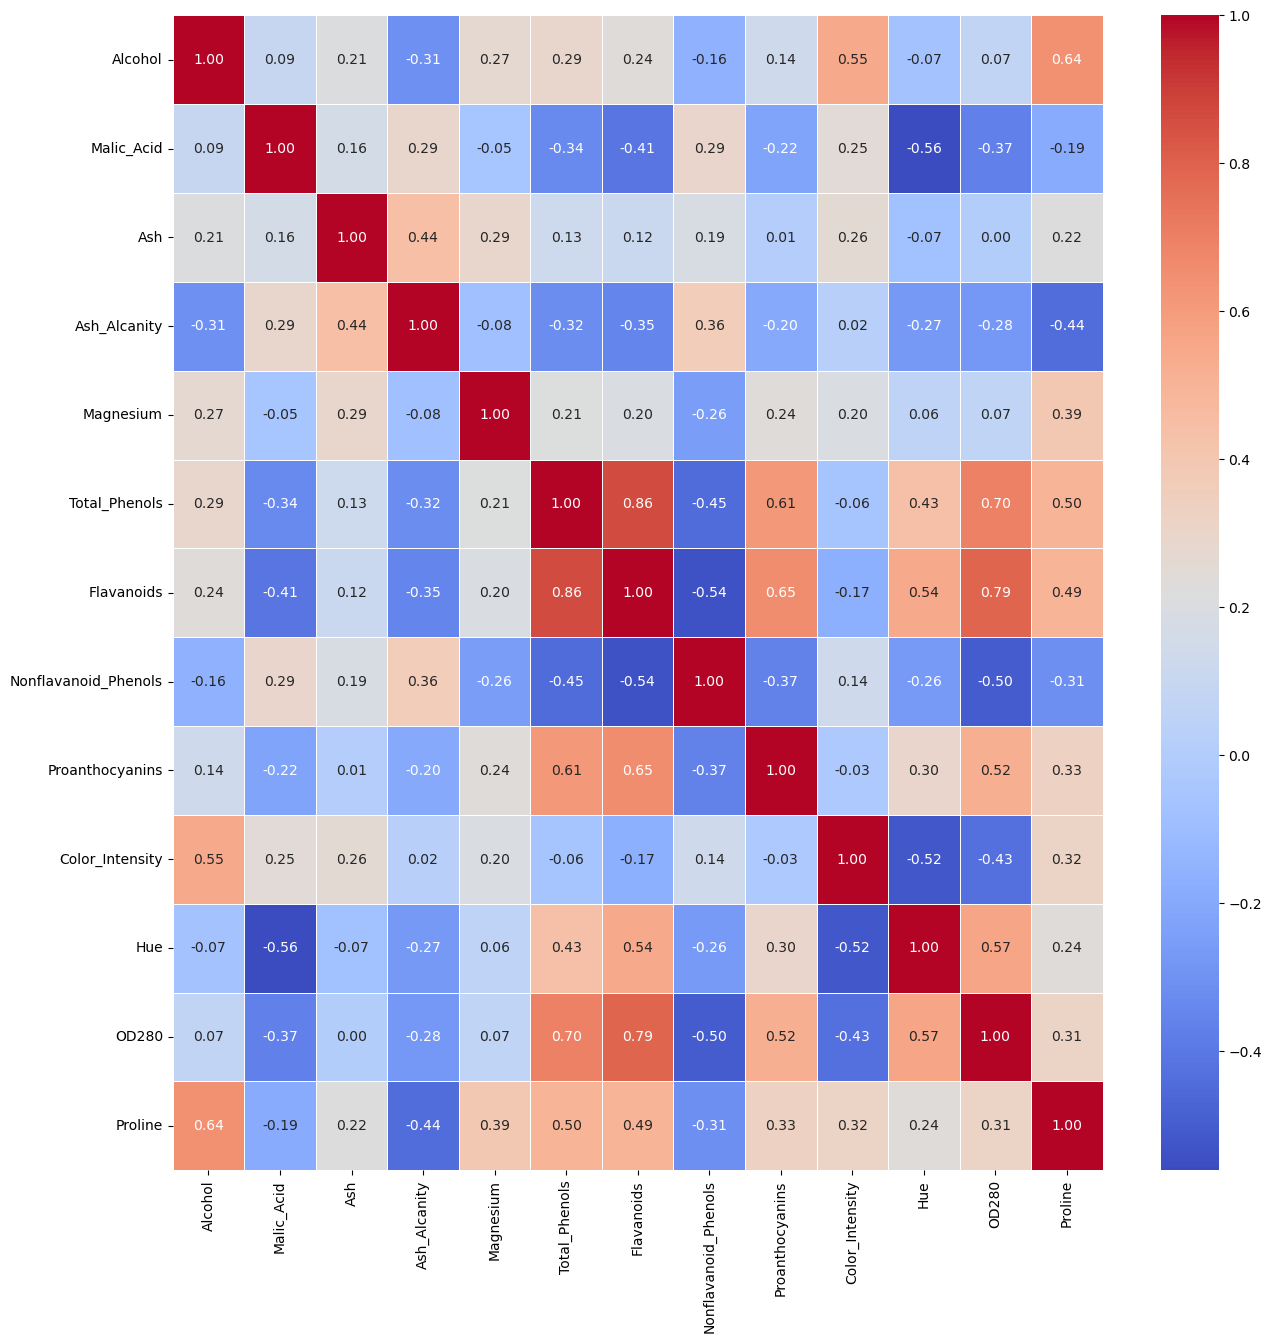

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

In [11]:
# High correlation between Total_Phenols and Flavanoids
df.drop("Flavanoids",axis=1,inplace=True)

### Missing value Check

In [12]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No missing value in the data set

### Outliers Check

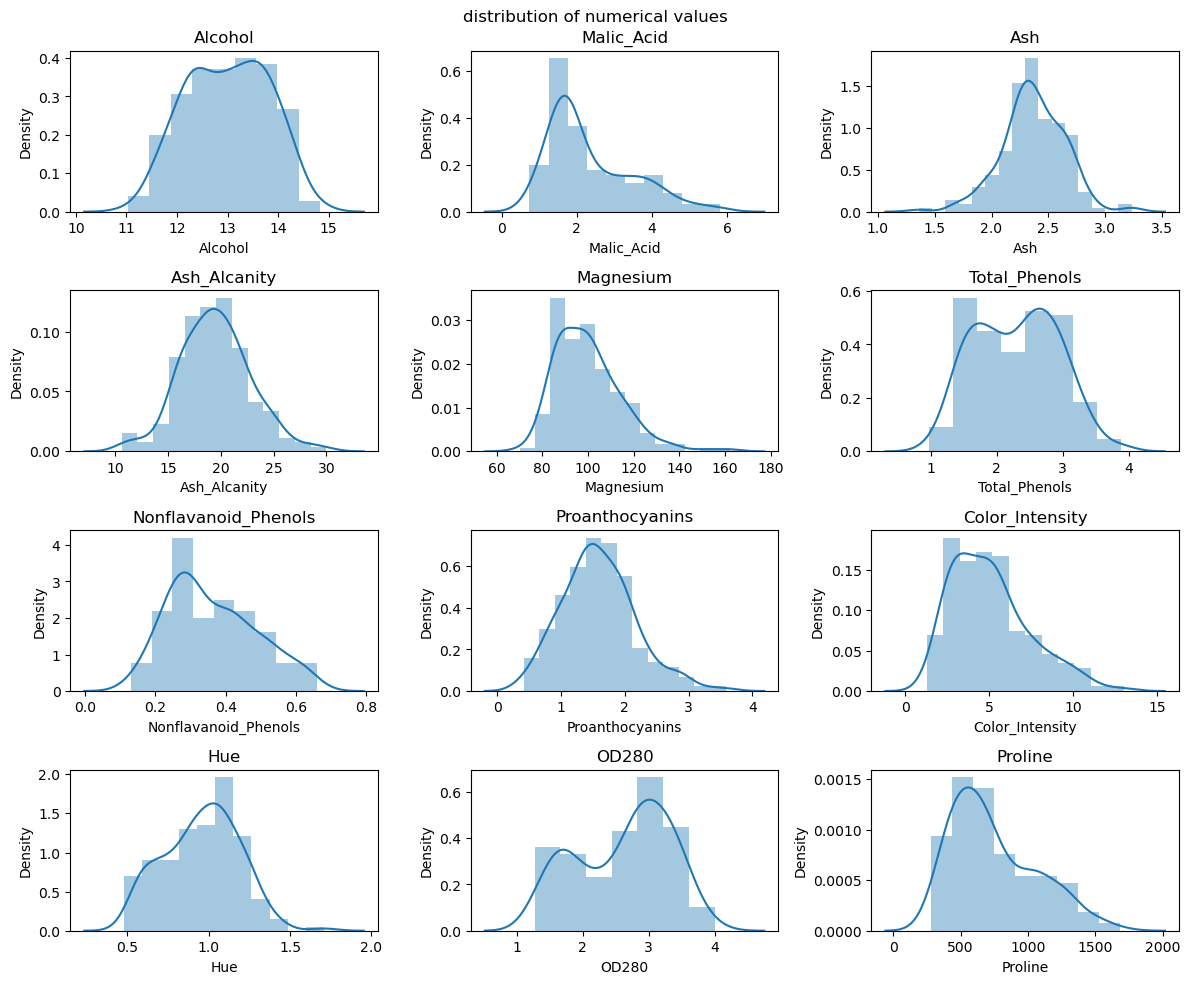

In [13]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")


for i in df:
    plt.subplot(5,3,k)   
    sns.distplot(df[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

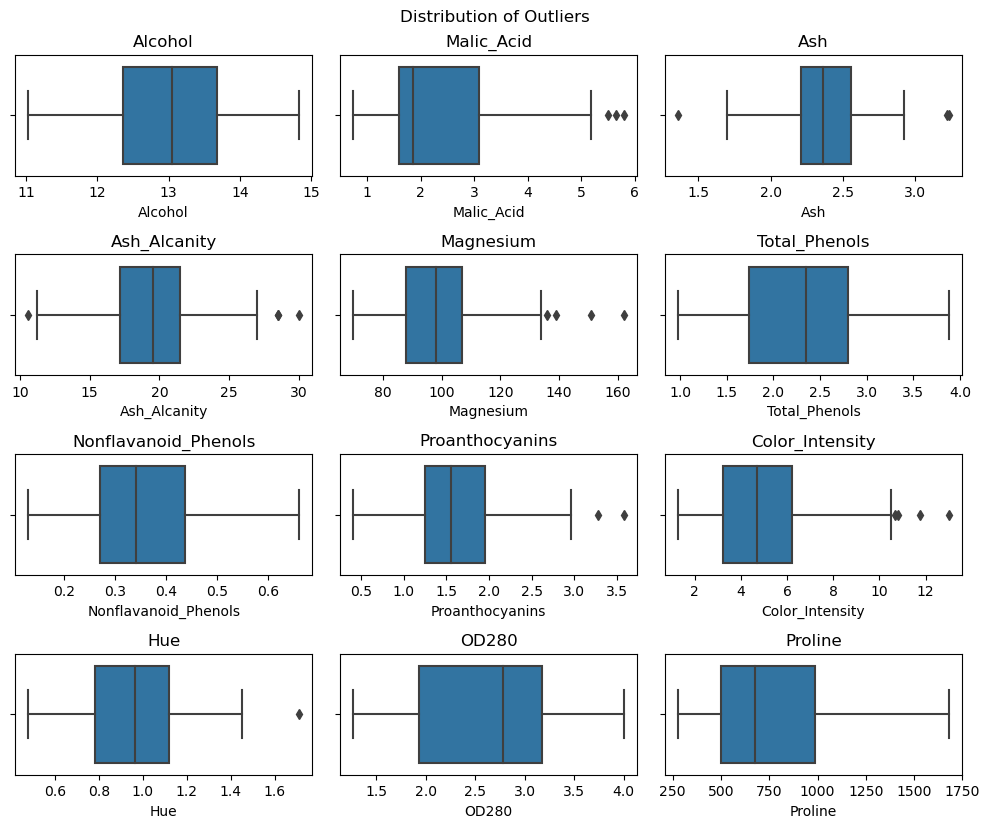

In [14]:
k=1
plt.figure(figsize=(10,10))
plt.suptitle("Distribution of Outliers")

for i in df:
    plt.subplot(5,3,k)
    sns.boxplot(x = i, data = df)
    plt.title(i)
    plt.tight_layout()
    k+=1

### Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1 = sc.fit_transform(df)


## KMeans Clustering

In [16]:
from sklearn.cluster import KMeans

In [17]:
from yellowbrick.cluster import KElbowVisualizer

elbow method ===> Finding optimal value of k 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



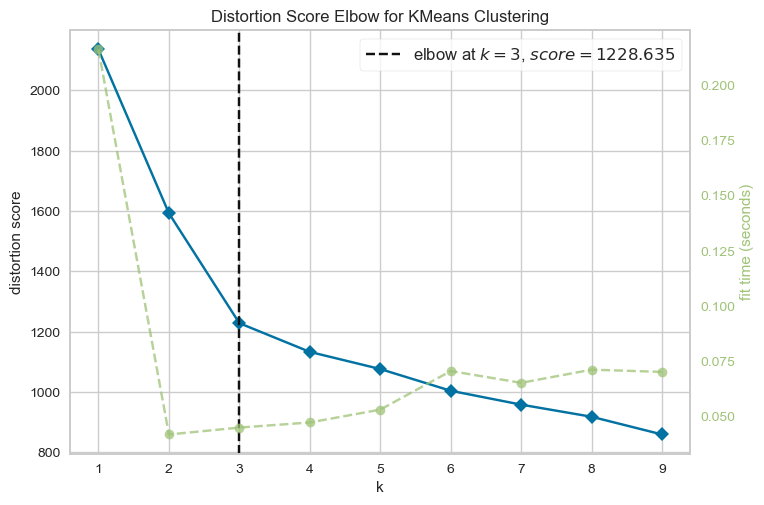

In [18]:
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,10))
visualizer.fit(df1)
visualizer.poof()
plt.show()

### from graph, elbow found at k = 3. 
### Hence lets build model with optimal value of k = 3

In [19]:

kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans

KMeans(n_clusters=3, random_state=42)

In [20]:
y_kmeans = kmeans.fit_predict(df1)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [21]:
# Get the cluster labels for each sample
labels = kmeans.labels_

In [22]:
# Add a new column for customer types based on cluster labels
df['Cluster_kmeans'] = labels

In [23]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_kmeans
0,14.23,1.71,2.43,15.6,127,2.80,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.53,1.46,9.30,0.60,1.62,840,2


In [24]:
2

2

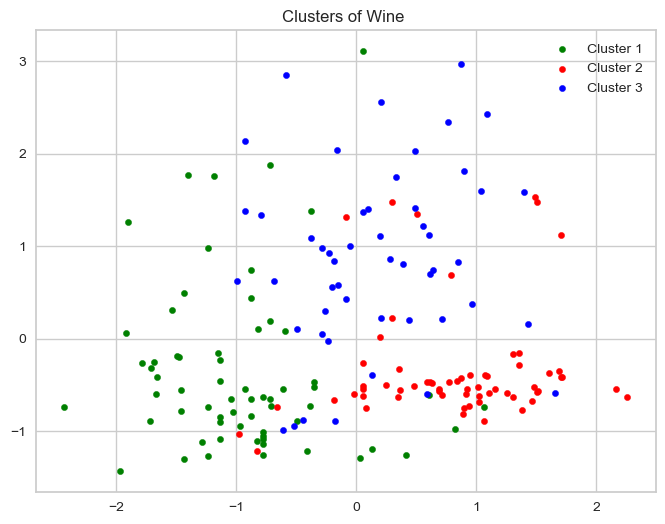

In [25]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df1[y_kmeans == 0, 0], df1[y_kmeans == 0, 1], s = 20 ,c ='green', label = 'Cluster 1')
plt.scatter(df1[y_kmeans == 1, 0], df1[y_kmeans == 1, 1], s = 20,c = 'red', label = 'Cluster 2')
plt.scatter(df1[y_kmeans == 2, 0], df1[y_kmeans == 2, 1], s = 20, c = 'blue', label = 'Cluster 3')


plt.title('Clusters of Wine ')

plt.legend()
plt.show()

In [26]:
from sklearn.metrics import silhouette_score
#Silhouette score of kmeans  clustering
silhouette_avg1 = silhouette_score(df, y_kmeans)
print(silhouette_avg1)

0.20424802333297254


## Agglomerative Hierarchical Clustering

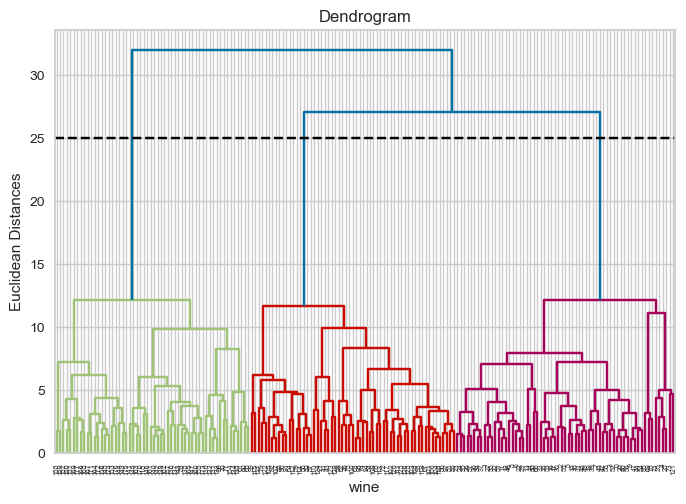

In [27]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df1, method = 'ward'))

# the linkage method determines how the distance between clusters is calculated
# The method='ward' parameter in the sch.linkage function refers to the Ward's method of linkage
# Ward's method is based on the analysis of variance (ANOVA)
# other methods are Single linkage ('single'), Complete linkage ('complete'), Average linkage ('average'),
#Centroid linkage ('centroid')

plt.title('Dendrogram')
plt.xlabel('wine')
plt.ylabel('Euclidean Distances')
plt.axhline(y=25,color="black",linestyle="--")
plt.show()

### From dendrogram its clearly visible that the largest vertical line, that is not being cut by any horzintal line, intersects at 3 points. 
### Hence the optimal number of clusters is 3

In [28]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

# n_clusters: number of clusters required
# affinity: This parameter determines the distance metric used for the linkage.
# affinity='euclidean' means Euclidean distance metric is used to measure the dissimilarity between points
# other affinity parametres are 'l1' or 'manhattan', 'l2' or 'euclidean', 'cosine', 'precomputed'

y_hc = hc.fit_predict(df1)

# y_hc array contains the predicted cluster labels for each data point in X


In [29]:
# Get the cluster labels for each sample
labels =hc.labels_

In [30]:
# Add a new column for customer types based on cluster labels
df['Cluster_hc'] = labels

In [31]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_kmeans,Cluster_hc
0,14.23,1.71,2.43,15.6,127,2.80,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,13.16,2.36,2.67,18.6,101,2.80,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,14.37,1.95,2.50,16.8,113,3.85,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,13.24,2.59,2.87,21.0,118,2.80,0.39,1.82,4.32,1.04,2.93,735,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.52,1.06,7.70,0.64,1.74,740,2,0
174,13.40,3.91,2.48,23.0,102,1.80,0.43,1.41,7.30,0.70,1.56,750,2,0
175,13.27,4.28,2.26,20.0,120,1.59,0.43,1.35,10.20,0.59,1.56,835,2,0
176,13.17,2.59,2.37,20.0,120,1.65,0.53,1.46,9.30,0.60,1.62,840,2,0


In [32]:
df.Cluster_hc.value_counts()

1    63
2    59
0    56
Name: Cluster_hc, dtype: int64

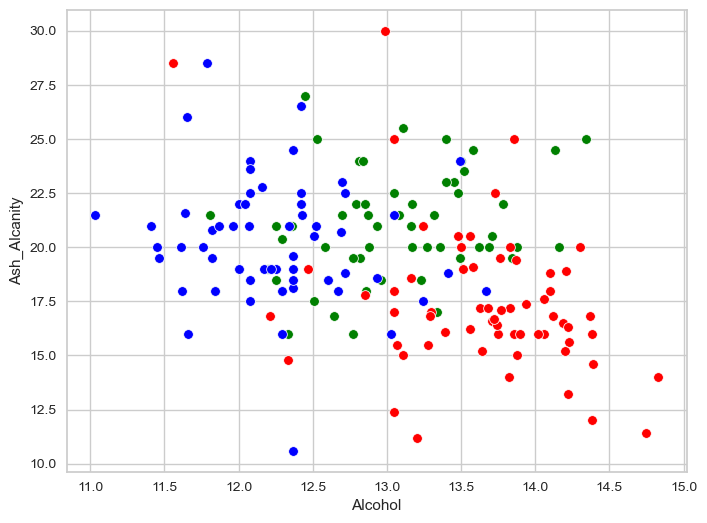

In [33]:
data1 = df[df['Cluster_hc']==0]
data2 = df[df['Cluster_hc']==1]
data3 = df[df['Cluster_hc']==2]

plt.figure(figsize=(8, 6))

sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=data1, color='green')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=data2, color='red')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=data3, color='blue')

# sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='purple', marker='*')


plt.xlabel('Alcohol')
plt.ylabel('Ash_Alcanity')

plt.show()

In [34]:
from sklearn.metrics import silhouette_score
#Silhouette score of hirearchial clustering
silhouette_avg1 = silhouette_score(df1, y_hc)
print(silhouette_avg1)

0.2603625288950571


## DBSCAN Clustering

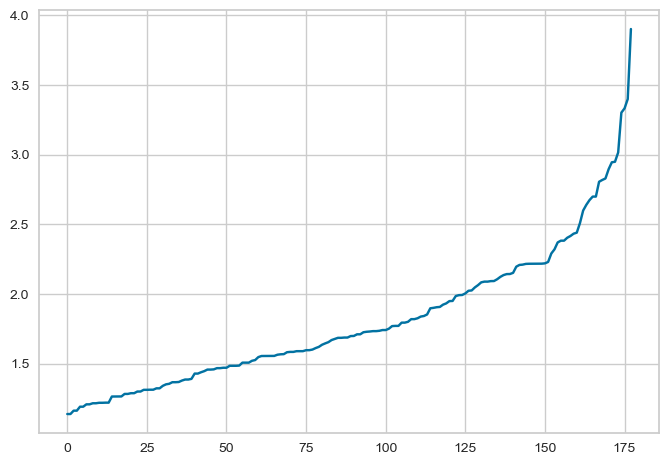

In [35]:
#K-nearest neighbor graph to find optimal eps value

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df1)
distances, indices = nbrs.kneighbors(df1)

## we sort and plot results
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### The optimal value for epsilon will be found at the point of maximum curvature

### We train our model, selecting 2.5 for eps and setting min_samples to 15.
### min_samples >= no of columns + 1

In [36]:
from sklearn.cluster import DBSCAN

In [37]:

db = DBSCAN(eps=2.5, min_samples=15).fit(df1)
y_db = db.fit(df1)

#The labels_ property contains the list of clusters and their respective points.
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 49


In [38]:
# Silhouette score

sil_avg = silhouette_score(df1, labels)
sil_avg

0.15337073177759392

In [39]:
# Add a new column for customer types based on cluster labels
df['Cluster_db'] = labels

In [40]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster_kmeans,Cluster_hc,Cluster_db
0,14.23,1.71,2.43,15.6,127,2.80,0.28,2.29,5.64,1.04,3.92,1065,1,1,0
1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.28,4.38,1.05,3.40,1050,1,1,0
2,13.16,2.36,2.67,18.6,101,2.80,0.30,2.81,5.68,1.03,3.17,1185,1,1,0
3,14.37,1.95,2.50,16.8,113,3.85,0.24,2.18,7.80,0.86,3.45,1480,1,1,0
4,13.24,2.59,2.87,21.0,118,2.80,0.39,1.82,4.32,1.04,2.93,735,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.52,1.06,7.70,0.64,1.74,740,2,0,1
174,13.40,3.91,2.48,23.0,102,1.80,0.43,1.41,7.30,0.70,1.56,750,2,0,1
175,13.27,4.28,2.26,20.0,120,1.59,0.43,1.35,10.20,0.59,1.56,835,2,0,1
176,13.17,2.59,2.37,20.0,120,1.65,0.53,1.46,9.30,0.60,1.62,840,2,0,1


In [41]:
df.Cluster_db.value_counts()

 0    96
-1    49
 1    33
Name: Cluster_db, dtype: int64

In [42]:
data1 = df[df['Cluster_db']==-1]
data2 = df[df['Cluster_db']==-0]
data3= df[df['Cluster_db']==1]


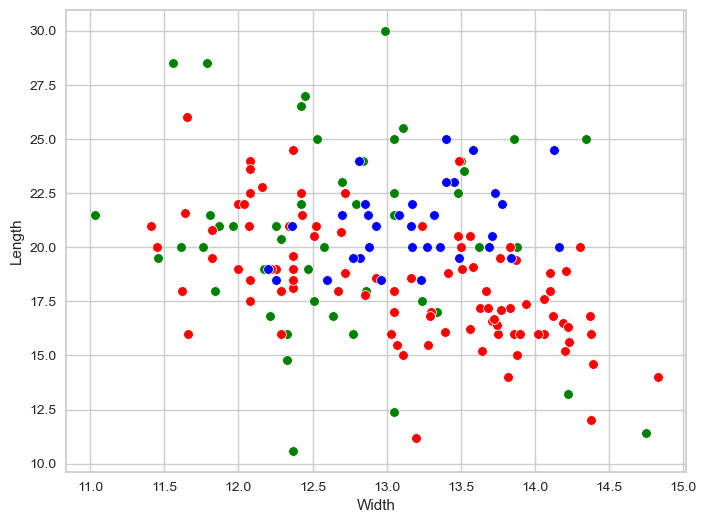

In [43]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=data1, color='green')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=data2, color='red')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=data3, color='blue')
plt.xlabel('Width')
plt.ylabel('Length')

plt.show()


In [44]:

# # evaluation metrics
# sc = metrics.silhouette_score(df1, labels)
# print("Silhouette Coefficient:%0.2f" % sc)
# ari = adjusted_rand_score(y_db, labels)
# print("Adjusted Rand Index: %0.2f" % ari)

In [45]:
sb = df[['Alcohol', 'Ash_Alcanity', 'Cluster_kmeans', 'Cluster_hc', 'Cluster_db']]
sb.head()

,Alcohol,Ash_Alcanity,Cluster_kmeans,Cluster_hc,Cluster_db
0,14.23,15.6,1,1,0
1,13.20,11.2,1,1,0
2,13.16,18.6,1,1,0
3,14.37,16.8,1,1,0
4,13.24,21.0,1,1,0


In [46]:
sb.shape

(178, 5)

In [47]:
km = sb['Cluster_kmeans'].value_counts()
hc = sb['Cluster_hc'].value_counts()
db = sb['Cluster_db'].value_counts()


In [48]:
data1 = pd.DataFrame({
    'KM_Cluster' : km.index,
    'K_Means' : km.values
}, columns=['KM_Cluster', 'K_Means'])

data1.set_index('KM_Cluster', inplace=True)

data1

,K_Means
KM_Cluster,
0,64
1,63
2,51


In [49]:
data2 = pd.DataFrame({
    'HC_Cluster' : hc.index,
    'Hierarchial' : hc.values
}, columns=['HC_Cluster', 'Hierarchial'])

data2.set_index('HC_Cluster', inplace=True)
data2

,Hierarchial
HC_Cluster,
1,63
2,59
0,56


In [50]:
data3 = pd.DataFrame({
    'DB_Cluster': db.index,
    'DBSCAN' : db.values
}, columns=['DB_Cluster', 'DBSCAN'])


data3.set_index('DB_Cluster', inplace=True)
data3

,DBSCAN
DB_Cluster,
0,96
-1,49
1,33


In [51]:
result = pd.concat([data1, data2, data3], axis=1)
result.fillna(0, inplace=True)
result

,K_Means,Hierarchial,DBSCAN
0,64.0,56.0,96.0
1,63.0,63.0,33.0
2,51.0,59.0,0.0
-1,0.0,0.0,49.0


In [52]:

trace1 = go.Bar(
    x=result.index,
    y=result['K_Means'],
    marker_color='orange',
    name='K_Means'
)

trace2 = go.Bar(
    x=result.index,
    y=result['Hierarchial'],
    marker_color='purple',
    name='Hierarchical'
)

trace3 = go.Bar(
    x=result.index,
    y=result['DBSCAN'],
    marker_color='green',
    name='DBSCAN'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='stack',
    title=" ________________",
    xaxis={
        'title':"Cluster",
    },
    yaxis={
        'title':"Cluster NUmber",
    }
)
figure=go.Figure(data=data,layout=layout)
py.offline.iplot(figure)

## Principal Component Analysis

In [53]:

from sklearn.decomposition import PCA
pc = PCA(n_components=2)
pc_arr = pc.fit_transform(df1)

In [54]:
pc_arr.shape

(178, 2)

In [55]:
trans_data = pd.DataFrame(pc_arr, columns = ["PC1","PC2"])

In [56]:
trans_data

,PC1,PC2
0,3.195942,-1.433655
1,2.164482,0.341295
2,2.163996,-1.027405
3,3.451585,-2.747487
4,0.743463,-0.870430
...,...,...
173,-3.055016,-2.224050
174,-2.275922,-1.762421
175,-2.275321,-2.764802
176,-1.955845,-2.300058


In [57]:
trans_data.corr().round(2)

,PC1,PC2
PC1,1.0,0.0
PC2,0.0,1.0


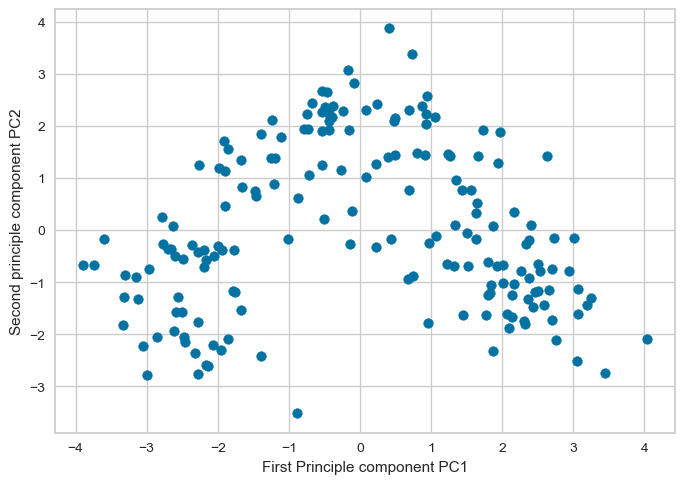

In [58]:
import matplotlib.pyplot as plt
plt.scatter(trans_data['PC1'],trans_data['PC2'])
plt.xlabel("First Principle component PC1")
plt.ylabel("Second principle component PC2")
plt.show()

In [59]:
pc.explained_variance_ratio_ * 100

array([32.52818521, 20.80778367])

## KMeans Clustering after PCA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



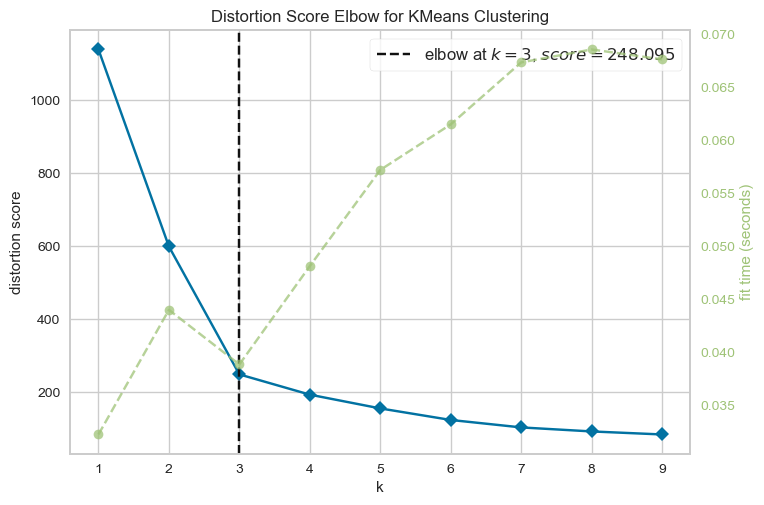

In [60]:
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,10))
visualizer.fit(trans_data)
visualizer.poof()
plt.show()

In [61]:
km=KMeans(n_clusters=3,init="k-means++",n_init=10,random_state=101)
y_kmeans = km.fit_predict(trans_data)

In [62]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [63]:
sil_avg = silhouette_score(trans_data, y_kmeans)
sil_avg

0.553141917185069

## Agglomerative HC after PCA

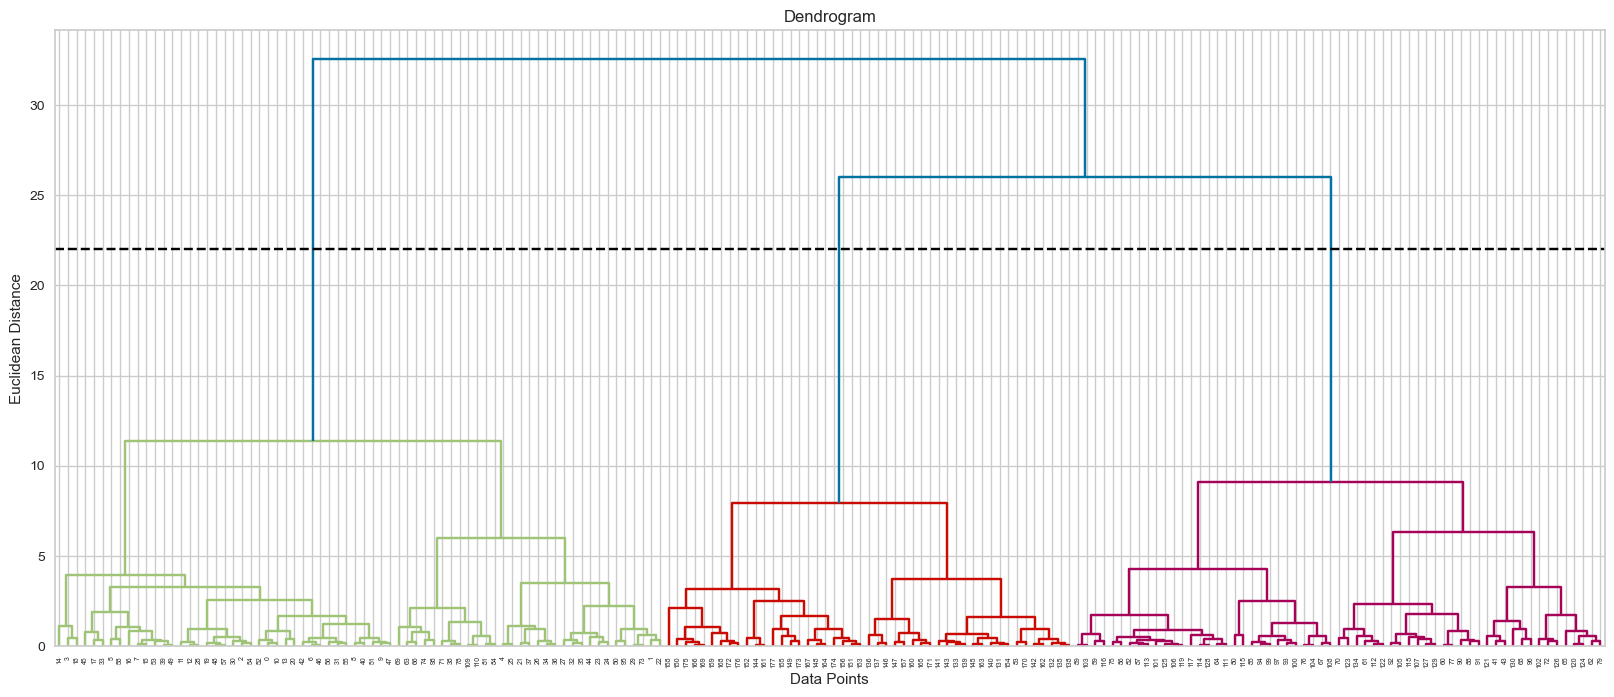

In [64]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(trans_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.axhline(y=22,color="black",linestyle="--")
plt.ylabel('Euclidean Distance')
plt.show()

In [65]:

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(trans_data)

In [66]:

y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [67]:
# Silhouette score

from sklearn.metrics import silhouette_score
sil_avg = silhouette_score(trans_data, y_hc)
sil_avg

0.5239884125465636

## DBSCAN after PCA

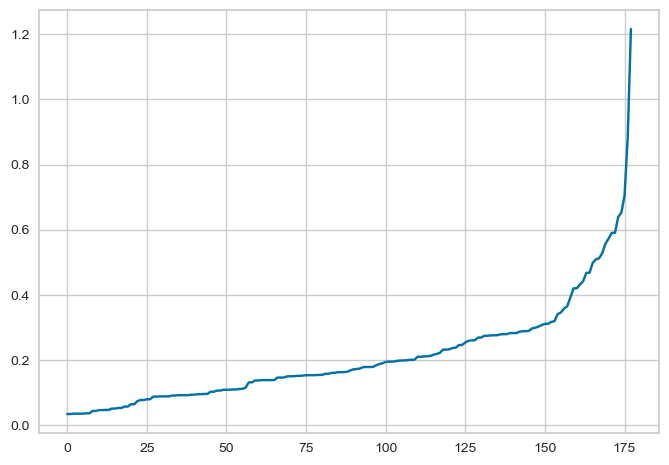

In [68]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(trans_data)
distances, indices = nbrs.kneighbors(trans_data)

## we sort and plot results
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


### The optimal value for epsilon will be found at the point of maximum curvature
### We train our model, selecting .6 for eps and setting min_samples to 15.
### min_samples >= no of columns + 1
### We train our model, selecting .6 for eps and setting min_samples to 15.

In [69]:
db = DBSCAN(eps=.6, min_samples=15).fit(trans_data)
model = db.fit(trans_data)

#The labels_ property contains the list of clusters and their respective points.
clusters = db.labels_

# Number of clusters in labels, ignoring noise if present.

n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 107


In [70]:
clusters

array([-1, -1,  0, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,
       -1, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0, -1,  0,
       -1,  0, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1, -1, -1, -1,  0, -1,  1, -1, -1, -1, -1, -1, -1,  1,  2, -1,
       -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  1,
       -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  2,  2,  2, -1,  2,
       -1, -1,  2,  2,  2,  2,  2,  2, -1,  2, -1, -1, -1, -1, -1, -1, -1,
       -1,  2, -1, -1, -1, -1, -1, -1, -1,  2,  2, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [71]:
# Silhouette score

sil_avg = silhouette_score(trans_data, clusters)
sil_avg

0.02197335556053176

### Insights:

<h3><font color='red'>Silhouette Scores improved after PCA for KMeans and Agglomerative HC while in DBSCAN it reduced little bit.</font></h3>